<a href="https://colab.research.google.com/github/Adibank/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [6]:
from sklearn.datasets import make_blobs

In [7]:
x,y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [8]:
x.shape

(300, 2)

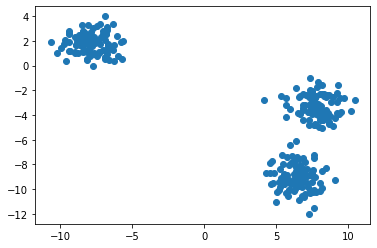

In [10]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0],x[:,1])

# Import

In [11]:
from sklearn.cluster import KMeans

# Define

In [16]:
KMclust = KMeans(n_clusters=3)

# Train

In [17]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Predict

In [18]:
label = KMclust.predict(x)

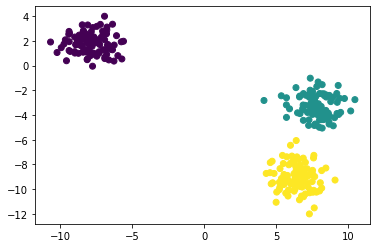

In [19]:
plt.scatter(x[:,0],x[:,1],c=label)

In [21]:
from google.colab import drive


In [22]:
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import cv2
import os

In [32]:
base_path = '/content/drive/My Drive/DWDM_material'

In [36]:
img = cv2.imread(os.path.join(base_path,'baboon.jpg'))

In [38]:
img.shape

(900, 632, 3)

In [37]:
img

array([[[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       [[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       [[ 24,  29,  30],
        [ 24,  29,  30],
        [ 24,  29,  30],
        ...,
        [ 82,  77,  79],
        [ 81,  76,  78],
        [ 81,  76,  78]],

       ...,

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 31,  34,  38],
        [ 31,  34,  38],
        [ 38,  41,  45]],

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 30,  33,  37],
        [ 29,  32,  36],
        [ 36,  39,  43]],

       [[ 52,  91, 136],
        [ 53,  92, 137],
        [ 53,  92, 137],
        ...,
        [ 29,  32,  36],
        [ 28,  31,  35],
        [ 35,  38,  42]]

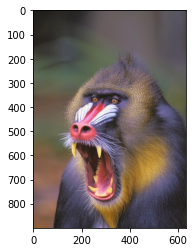

In [39]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

# count unique colors

In [46]:
import numpy as np

In [47]:
np.unique(RGB_img).shape

(256,)

In [48]:
#Define
myQuantize = KMeans(n_clusters=10)

In [49]:
img_row = np.reshape(RGB_img,(900*632, 3))

In [50]:
img_row

array([[30, 29, 24],
       [30, 29, 24],
       [30, 29, 24],
       ...,
       [36, 32, 29],
       [35, 31, 28],
       [42, 38, 35]], dtype=uint8)

In [51]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
#Predict
res = myQuantize.predict(img_row)

In [53]:
res

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

# Get cluster centers

In [54]:
Clus_cen = myQuantize.cluster_centers_

In [55]:
Clus_cen

array([[ 96.72830461,  93.52099514,  84.85368225],
       [223.40699935, 164.63220998, 156.26934543],
       [ 47.4422861 ,  42.8369979 ,  42.81493728],
       [132.56726055,  92.67272654,  62.58301891],
       [142.51662075, 110.42574861, 103.03360282],
       [ 70.96825326,  67.5472871 ,  76.73037474],
       [185.46423792, 128.63286245,  74.00084263],
       [160.77242769, 138.83367617, 147.80584358],
       [106.193933  ,  96.7442286 , 113.32736486],
       [226.25859174, 218.33717676, 232.98253666]])

In [56]:
Clus_cen.shape

(10, 3)

# Map color back to the image

In [57]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
      new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [58]:
new_img_ = new_img/255

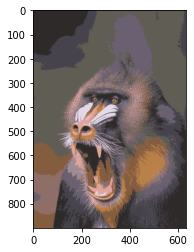

In [59]:
plt.imshow(new_img_)